In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud #text visualization
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Link of Dataset**

https://www.kaggle.com/datasets/nandhanasuresh/e-mail-spam-detection-dataset

In [156]:
df = pd.read_csv("/content/spam.csv", encoding = 'latin1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [157]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [158]:
# Rename the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [159]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head(5) # 0 = ham and 1 = spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [160]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [161]:
#check duplicate values
df.duplicated().sum()

403

In [162]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [163]:
df.shape

(5169, 2)

In [164]:
values = df['target'].value_counts() # ham = 0 and spam = 1
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 {ham} :' ,percentage_0)
print('percentage of 1 {spam} :' ,percentage_1)

percentage of 0 {ham} : 87.3669955503966
percentage of 1 {spam} : 12.633004449603405


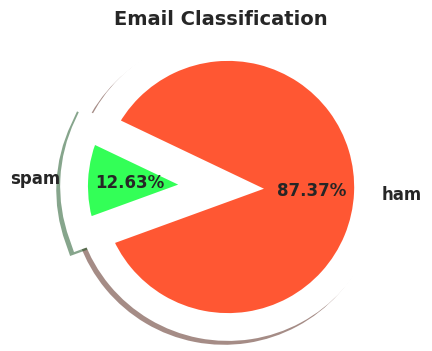

In [165]:
import matplotlib.pyplot as plt

colors = ['#FF5733', '#33FF57']
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_facecolor('white')


wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=200,
    colors=colors,
    wedgeprops={'linewidth': 20, 'edgecolor': 'white'},
    explode=explode,
    shadow=True
)


for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=12, weight='bold')


ax.set_title('Email Classification', fontsize=14, fontweight='bold')
ax.axis('equal')

plt.show()


In [166]:
df['num_characters'] = df['text'].apply(len) # Get the numebr of characters of a Sentence
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # Get the numebr of Words of a Sentence
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))# Get the of a Sentence
df.head(5)

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [167]:
df.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [168]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [169]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [170]:
# colloration matrix
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


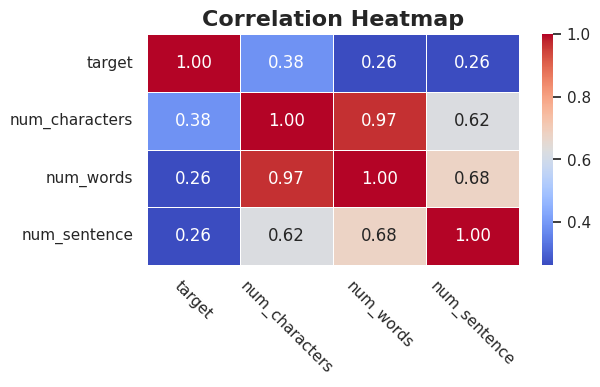

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()
plt.figure(figsize=(6, 3))
sns.set(font_scale=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=-45)
plt.show()

In [172]:
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [173]:
print(transform_text(df['text'][0]))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [174]:
df['transformed_text'] = df['text'].apply(transform_text)

In [175]:
df.head(5)

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b

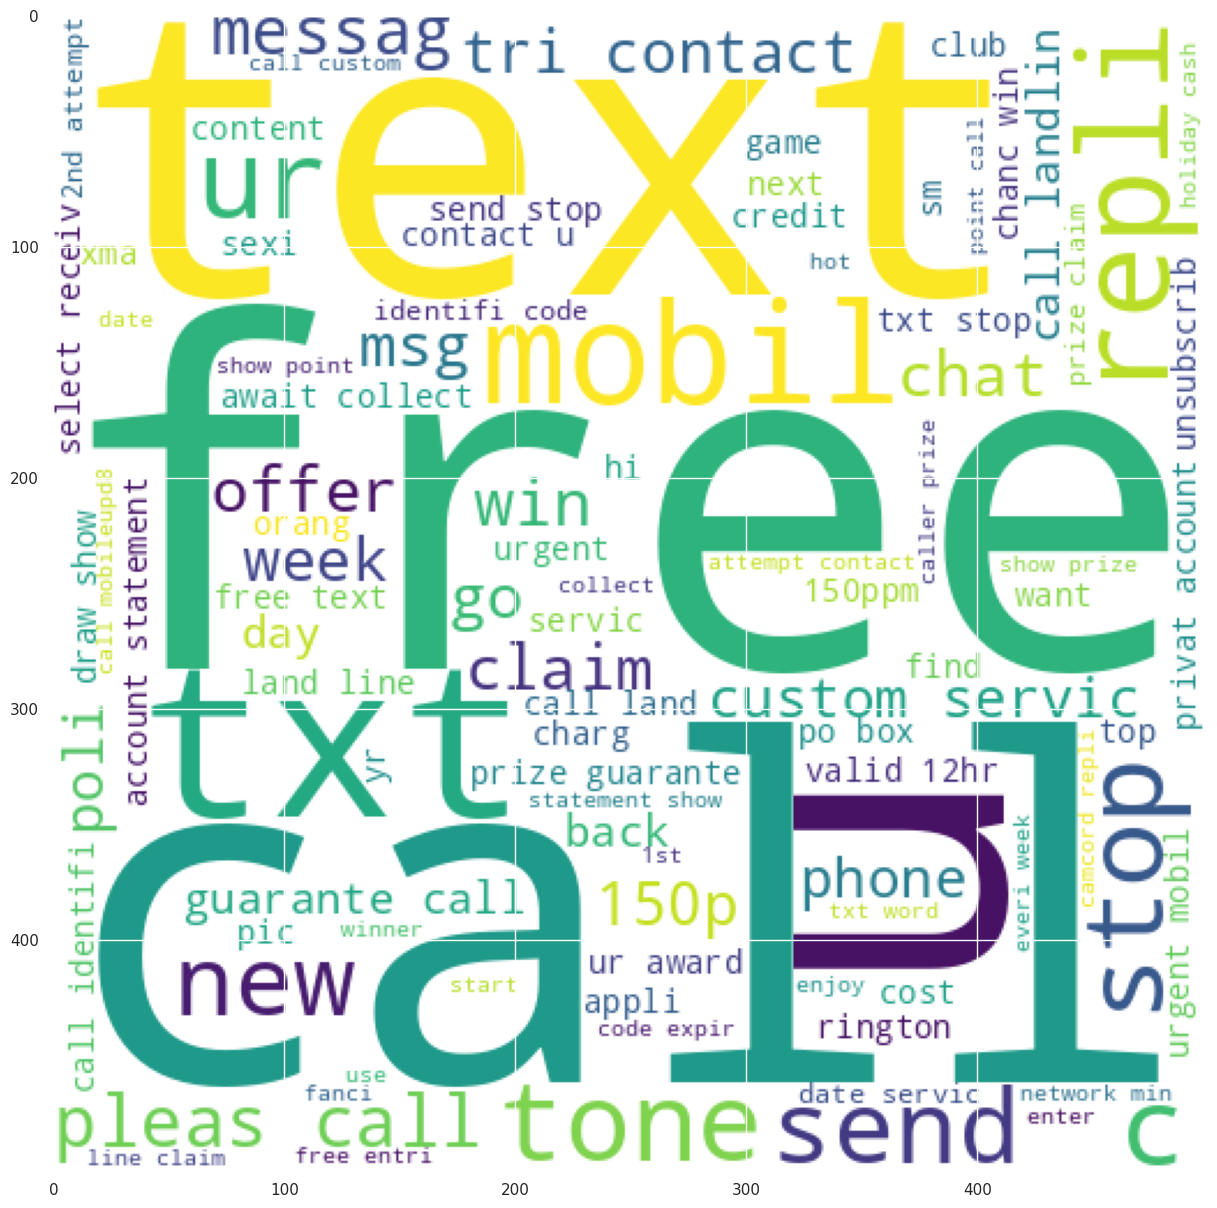

In [176]:
# WordCloud for spam
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (30,15))
plt.imshow(spam_wc)
plt.show()

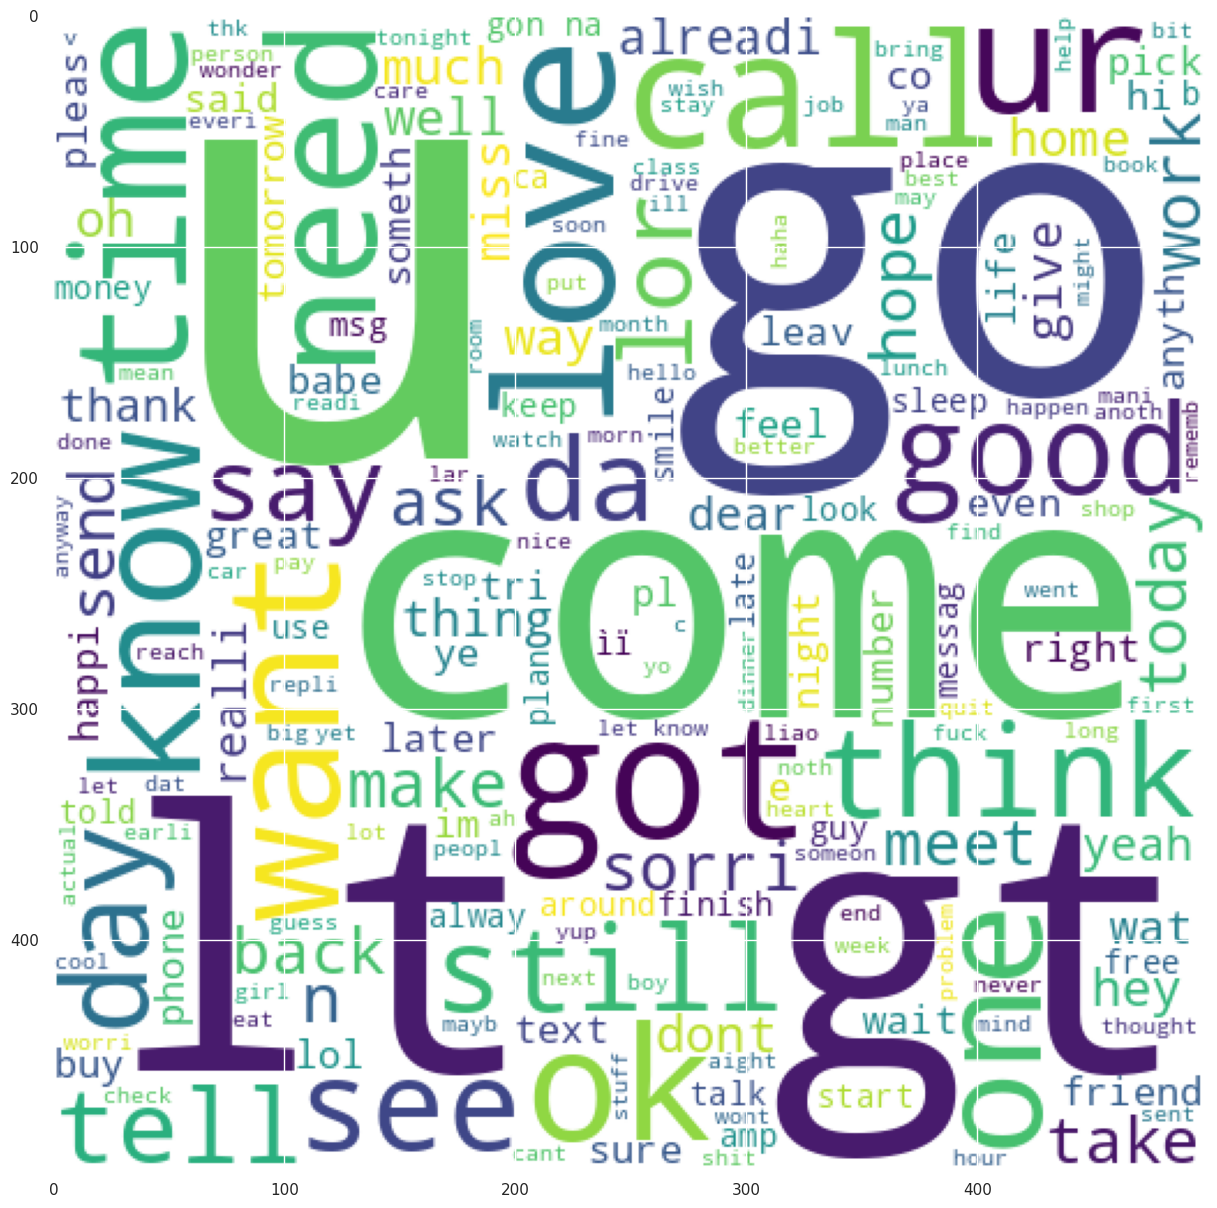

In [177]:
# WordCloud for ham
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (30,15))
plt.imshow(ham_wc)
plt.show()

In [178]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [179]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [181]:
from sklearn.svm import SVC
svc = SVC(kernel= "sigmoid", gamma  = 1.0)

In [182]:
from sklearn.metrics import accuracy_score
model = svc.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [183]:
print(f'the accuracy is: {accuracy}')

the accuracy is: 0.9758220502901354
